In [355]:
import requests
from tqdm.auto import tqdm
import json
import pandas as pd
import numpy as np
import datetime

import matplotlib.pyplot as plt

In [356]:
sber = '3529'
page = 1
num_per_page = 100
moscow = 1
url = f'https://api.hh.ru/vacancies?employer_id={sber}&per_page={num_per_page}'
url

'https://api.hh.ru/vacancies?employer_id=3529&per_page=100'

In [357]:
res = requests.get(url)
vacancies = res.json()
num_vac = vacancies.get('found')
num_vac

2295

In [358]:
## Задание вытащить все вакансии СБЕРа с ХХ (у апи есть ограничение в 2000, подумайте как его обойти)
## Заранее знаем, что вакансий примерно 2908. 
## Апи всегда возвращает не более 2000, потому нужно на уровне выборки ограничить количество отображаемых вакансий. 
## Пробуем итерироваться по дате по промежуткам в 10 дней. Кол-во итераций подобрано вручную, проводила тест, чтобы посмотреть после какой даты уже нт вакансий. 
## Далее внутрикаждой итерации в цикле перебираем кол-во страниц по 100 вакансий

all_vacancy_ids= []
StartTime = (datetime.datetime.now() - datetime.timedelta(days = 10) ).isoformat()
EndTime   = (datetime.datetime.now()).isoformat()

for i in tqdm(range(1,6)):
    print('\n')
    print(StartTime)
    print(EndTime)

    try:
        url = f'https://api.hh.ru/vacancies?employer_id={sber}&date_from={StartTime}&date_to={EndTime}'
        res = requests.get(url)
        vacancies = res.json()
        print('Всего найдено за период: ', vacancies.get('found'))
        for j in range(vacancies.get('found')//100+1):
            url = f'https://api.hh.ru/vacancies?employer_id={sber}&page={j}&per_page={num_per_page}&date_from={StartTime}&date_to={EndTime}'
            res = requests.get(url)
            vacancies = res.json()
            vacancy_ids = [el.get('id') for el in vacancies.get('items')]
            all_vacancy_ids.extend(vacancy_ids)
        print('Кол-во вакансий суммарно: ', len(all_vacancy_ids))
    except:
        print('err')
        pass
    finally:
        EndTime = StartTime
        StartTime = (datetime.datetime.now() - datetime.timedelta(days = i*10)).isoformat()

        



2022-03-31T21:19:17.082128
2022-04-10T21:19:17.082128
Всего найдено за период:  944
Кол-во вакансий суммарно:  944


2022-03-31T21:19:22.440348
2022-03-31T21:19:17.082128
Всего найдено за период:  None
err


2022-03-21T21:19:22.556889
2022-03-31T21:19:22.440348
Всего найдено за период:  774
Кол-во вакансий суммарно:  1718


2022-03-11T21:19:27.395008
2022-03-21T21:19:22.556889
Всего найдено за период:  577
Кол-во вакансий суммарно:  2295


2022-03-01T21:19:33.288249
2022-03-11T21:19:27.395008
Всего найдено за период:  0
Кол-во вакансий суммарно:  2295



In [359]:
# Итого вакансий прочитано
len(all_vacancy_ids)

2295

In [360]:
# Вытащите все полные описания этих вакансий по запросу с https://api.hh.ru/vacancies/43326020 где 43326020 id вакансии
# + перевод json в df для дальнейшего удобсва аналитики

extracted = pd.DataFrame()

for i in tqdm(all_vacancy_ids):
    url = f'https://api.hh.ru/vacancies/{i}'
    res = requests.get(url)
    vacancies = res.json()
    extracted = pd.concat([extracted, pd.io.json.json_normalize(vacancies)])
extracted


C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:11: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  # This is added back by InteractiveShellApp.init_path()


,id,premium,relations,name,insider_interview,response_letter_required,salary,address,allow_messages,contacts,...,address.raw,address.metro.station_name,address.metro.line_name,address.metro.station_id,address.metro.line_id,address.metro.lat,address.metro.lng,address.metro_stations,address.metro,test.required
0,54687625,False,[],"Персональный водитель (Самара, Самарская область)",None,False,None,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54592406,False,[],Специалист технической поддержки Sber Cloud,None,False,NaN,None,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54688968,False,[],ИТ-лидер трайба,None,False,None,NaN,True,None,...,"Москва, Кутузовский проспект, 32",Кутузовская,МЦК,95.536,95,55.740833,37.533333,"[{'station_name': 'Кутузовская', 'line_name': ...",NaN,NaN
0,54685541,False,[],Водитель-инкассатор,None,False,NaN,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54551127,False,[],Сбер Агент,None,False,None,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,49531729,False,[],Старший менеджер по обслуживанию (Омская облас...,None,False,NaN,None,True,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,52516340,False,[],Ведущий инженер/DevOps,None,False,None,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,54161566,False,[],Руководитель направления в Отдел Статических Д...,None,False,None,None,False,None,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
0,50928893,False,[],Системный аналитик (хранилища данных),None,False,None,NaN,True,None,...,Москва,NaN,NaN,NaN,NaN,NaN,NaN,[],None,NaN


In [361]:
extracted = extracted[['id', 'name', 'description', 
       'key_skills','archived','specializations', 'professional_roles', 
        'published_at', 'created_at',
       'negotiations_url', 'suitable_resumes_url', 
       'working_days',
       'working_time_intervals', 'working_time_modes', 'accept_temporary',
       'area.name',
       'salary.gross', 'type.name', 
        'experience.name',  'schedule.name',
       'employment.name', 'department.name',
       'employer.name',   'salary' ]]
extracted

,id,name,description,key_skills,archived,specializations,professional_roles,published_at,created_at,negotiations_url,...,accept_temporary,area.name,salary.gross,type.name,experience.name,schedule.name,employment.name,department.name,employer.name,salary
0,54687625,"Персональный водитель (Самара, Самарская область)",<strong>Обязанности:</strong> <ul> <li>управле...,[{'name': 'пдд'}],False,"[{'id': '21.17', 'name': 'Автоперевозки', 'pro...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08T15:30:40+0300,2022-04-08T15:30:40+0300,None,...,False,Самара,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None
0,54592406,Специалист технической поддержки Sber Cloud,<p>Мы расширяемся и ищем специалистов 1 линии ...,"[{'name': 'Английский язык'}, {'name': 'Делово...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-04-05T13:11:57+0300,2022-04-05T13:11:57+0300,None,...,False,Тверь,True,Открытая,От 1 года до 3 лет,Удаленная работа,Полная занятость,Сбер. IT,Сбербанк,NaN
0,54688968,ИТ-лидер трайба,<p>Ищем в команду человека на роль IT Lead (Ис...,[],False,"[{'id': '9.94', 'name': 'Информационные технол...","[{'id': '36', 'name': 'Директор по информацион...",2022-04-08T16:05:06+0300,2022-04-08T16:05:06+0300,None,...,False,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None
0,54685541,Водитель-инкассатор,<p>Водители-инкассаторы— это настоящие професс...,[],False,"[{'id': '5.192', 'name': 'Обменные пункты, Бан...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08T14:26:38+0300,2022-04-08T14:26:38+0300,None,...,False,Магнитогорск,True,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,NaN
0,54551127,Сбер Агент,<p>Сбер Агент - это программа рекомендаций по ...,[],False,"[{'id': '8.77', 'name': 'Имущественная безопас...","[{'id': '95', 'name': 'Полицейский'}]",2022-04-04T11:30:50+0300,2022-04-04T11:30:50+0300,None,...,False,Екатеринбург,NaN,Открытая,Нет опыта,Полный день,Частичная занятость,Сбер для экспертов,Сбербанк,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,49531729,Старший менеджер по обслуживанию (Омская облас...,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Работа с клиентами'}, {'name': 'Кли...",False,"[{'id': '17.242', 'name': 'Прямые продажи', 'p...","[{'id': '70', 'name': 'Менеджер по продажам, м...",2022-03-19T11:39:58+0300,2022-03-19T11:39:58+0300,None,...,False,Омск,True,Открытая,Нет опыта,Гибкий график,Частичная занятость,Сбер. Работа с клиентами,Сбербанк,NaN
0,52516340,Ведущий инженер/DevOps,"<p>Сбер сейчас это, крупнейшая цифровая экосис...",[],False,"[{'id': '1.270', 'name': 'Сетевые технологии',...","[{'id': '113', 'name': 'Системный администрато...",2022-03-16T12:32:34+0300,2022-03-16T12:32:34+0300,None,...,False,Екатеринбург,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None
0,54161566,Руководитель направления в Отдел Статических Д...,<p>В Отдел статических данных Управления Миддл...,"[{'name': 'Market Data'}, {'name': 'Бэк офис'}...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-03-21T15:50:12+0300,2022-03-21T15:50:12+0300,None,...,False,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None
0,50928893,Системный аналитик (хранилища данных),<p>Наша команда «Управление развития аналитиче...,"[{'name': 'SQL'}, {'name': 'Atlassian Jira'}, ...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '10', 'name': 'Аналитик'}]",2022-03-12T13:39:06+0300,2022-03-12T13:39:06+0300,None,...,False,Москва,NaN,Открытая,От 1 года до 3 лет,Гибкий график,Полная занятость,Сбер. IT,Сбербанк,None


In [362]:
# Создайте аналогичный vacancy DataFrame только добавьте поле skills
extracted = extracted[extracted.id.notnull()]
extracted['skills'] = extracted.key_skills.apply(lambda x: [d['name'] for d in x])
extracted

,id,name,description,key_skills,archived,specializations,professional_roles,published_at,created_at,negotiations_url,...,area.name,salary.gross,type.name,experience.name,schedule.name,employment.name,department.name,employer.name,salary,skills
0,54687625,"Персональный водитель (Самара, Самарская область)",<strong>Обязанности:</strong> <ul> <li>управле...,[{'name': 'пдд'}],False,"[{'id': '21.17', 'name': 'Автоперевозки', 'pro...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08T15:30:40+0300,2022-04-08T15:30:40+0300,None,...,Самара,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,[пдд]
0,54592406,Специалист технической поддержки Sber Cloud,<p>Мы расширяемся и ищем специалистов 1 линии ...,"[{'name': 'Английский язык'}, {'name': 'Делово...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-04-05T13:11:57+0300,2022-04-05T13:11:57+0300,None,...,Тверь,True,Открытая,От 1 года до 3 лет,Удаленная работа,Полная занятость,Сбер. IT,Сбербанк,NaN,"[Английский язык, Деловое общение, Деловая ком..."
0,54688968,ИТ-лидер трайба,<p>Ищем в команду человека на роль IT Lead (Ис...,[],False,"[{'id': '9.94', 'name': 'Информационные технол...","[{'id': '36', 'name': 'Директор по информацион...",2022-04-08T16:05:06+0300,2022-04-08T16:05:06+0300,None,...,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,[]
0,54685541,Водитель-инкассатор,<p>Водители-инкассаторы— это настоящие професс...,[],False,"[{'id': '5.192', 'name': 'Обменные пункты, Бан...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08T14:26:38+0300,2022-04-08T14:26:38+0300,None,...,Магнитогорск,True,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,NaN,[]
0,54551127,Сбер Агент,<p>Сбер Агент - это программа рекомендаций по ...,[],False,"[{'id': '8.77', 'name': 'Имущественная безопас...","[{'id': '95', 'name': 'Полицейский'}]",2022-04-04T11:30:50+0300,2022-04-04T11:30:50+0300,None,...,Екатеринбург,NaN,Открытая,Нет опыта,Полный день,Частичная занятость,Сбер для экспертов,Сбербанк,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,49531729,Старший менеджер по обслуживанию (Омская облас...,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Работа с клиентами'}, {'name': 'Кли...",False,"[{'id': '17.242', 'name': 'Прямые продажи', 'p...","[{'id': '70', 'name': 'Менеджер по продажам, м...",2022-03-19T11:39:58+0300,2022-03-19T11:39:58+0300,None,...,Омск,True,Открытая,Нет опыта,Гибкий график,Частичная занятость,Сбер. Работа с клиентами,Сбербанк,NaN,"[Работа с клиентами, Клиентоориентированность,..."
0,52516340,Ведущий инженер/DevOps,"<p>Сбер сейчас это, крупнейшая цифровая экосис...",[],False,"[{'id': '1.270', 'name': 'Сетевые технологии',...","[{'id': '113', 'name': 'Системный администрато...",2022-03-16T12:32:34+0300,2022-03-16T12:32:34+0300,None,...,Екатеринбург,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,[]
0,54161566,Руководитель направления в Отдел Статических Д...,<p>В Отдел статических данных Управления Миддл...,"[{'name': 'Market Data'}, {'name': 'Бэк офис'}...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-03-21T15:50:12+0300,2022-03-21T15:50:12+0300,None,...,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,"[Market Data, Бэк офис, Bloomberg, Diasoft, Фо..."
0,50928893,Системный аналитик (хранилища данных),<p>Наша команда «Управление развития аналитиче...,"[{'name': 'SQL'}, {'name': 'Atlassian Jira'}, ...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '10', 'name': 'Аналитик'}]",2022-03-12T13:39:06+0300,2022-03-12T13:39:06+0300,None,...,Москва,NaN,Открытая,От 1 года до 3 лет,Гибкий график,Полная занятость,Сбер. IT,Сбербанк,None,"[SQL, Atlassian Jira, Kafka, PostgreSQL, Java]"


In [363]:
# Переведите даты публикаций в datetime
extracted['published_at'] = pd.to_datetime(extracted['published_at']).dt.date
extracted['created_at'] = pd.to_datetime(extracted['created_at']).dt.date
extracted

,id,name,description,key_skills,archived,specializations,professional_roles,published_at,created_at,negotiations_url,...,area.name,salary.gross,type.name,experience.name,schedule.name,employment.name,department.name,employer.name,salary,skills
0,54687625,"Персональный водитель (Самара, Самарская область)",<strong>Обязанности:</strong> <ul> <li>управле...,[{'name': 'пдд'}],False,"[{'id': '21.17', 'name': 'Автоперевозки', 'pro...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08,2022-04-08,None,...,Самара,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,[пдд]
0,54592406,Специалист технической поддержки Sber Cloud,<p>Мы расширяемся и ищем специалистов 1 линии ...,"[{'name': 'Английский язык'}, {'name': 'Делово...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-04-05,2022-04-05,None,...,Тверь,True,Открытая,От 1 года до 3 лет,Удаленная работа,Полная занятость,Сбер. IT,Сбербанк,NaN,"[Английский язык, Деловое общение, Деловая ком..."
0,54688968,ИТ-лидер трайба,<p>Ищем в команду человека на роль IT Lead (Ис...,[],False,"[{'id': '9.94', 'name': 'Информационные технол...","[{'id': '36', 'name': 'Директор по информацион...",2022-04-08,2022-04-08,None,...,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,[]
0,54685541,Водитель-инкассатор,<p>Водители-инкассаторы— это настоящие професс...,[],False,"[{'id': '5.192', 'name': 'Обменные пункты, Бан...","[{'id': '21', 'name': 'Водитель'}]",2022-04-08,2022-04-08,None,...,Магнитогорск,True,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,NaN,[]
0,54551127,Сбер Агент,<p>Сбер Агент - это программа рекомендаций по ...,[],False,"[{'id': '8.77', 'name': 'Имущественная безопас...","[{'id': '95', 'name': 'Полицейский'}]",2022-04-04,2022-04-04,None,...,Екатеринбург,NaN,Открытая,Нет опыта,Полный день,Частичная занятость,Сбер для экспертов,Сбербанк,None,[]
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,49531729,Старший менеджер по обслуживанию (Омская облас...,<p>Сбер — лучший работодатель России. У нас бо...,"[{'name': 'Работа с клиентами'}, {'name': 'Кли...",False,"[{'id': '17.242', 'name': 'Прямые продажи', 'p...","[{'id': '70', 'name': 'Менеджер по продажам, м...",2022-03-19,2022-03-19,None,...,Омск,True,Открытая,Нет опыта,Гибкий график,Частичная занятость,Сбер. Работа с клиентами,Сбербанк,NaN,"[Работа с клиентами, Клиентоориентированность,..."
0,52516340,Ведущий инженер/DevOps,"<p>Сбер сейчас это, крупнейшая цифровая экосис...",[],False,"[{'id': '1.270', 'name': 'Сетевые технологии',...","[{'id': '113', 'name': 'Системный администрато...",2022-03-16,2022-03-16,None,...,Екатеринбург,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,[]
0,54161566,Руководитель направления в Отдел Статических Д...,<p>В Отдел статических данных Управления Миддл...,"[{'name': 'Market Data'}, {'name': 'Бэк офис'}...",False,"[{'id': '17.256', 'name': 'Розничная торговля'...","[{'id': '40', 'name': 'Другое'}]",2022-03-21,2022-03-21,None,...,Москва,NaN,Открытая,Более 6 лет,Полный день,Полная занятость,Сбер для экспертов,Сбербанк,None,"[Market Data, Бэк офис, Bloomberg, Diasoft, Фо..."
0,50928893,Системный аналитик (хранилища данных),<p>Наша команда «Управление развития аналитиче...,"[{'name': 'SQL'}, {'name': 'Atlassian Jira'}, ...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '10', 'name': 'Аналитик'}]",2022-03-12,2022-03-12,None,...,Москва,NaN,Открытая,От 1 года до 3 лет,Гибкий график,Полная занятость,Сбер. IT,Сбербанк,None,"[SQL, Atlassian Jira, Kafka, PostgreSQL, Java]"


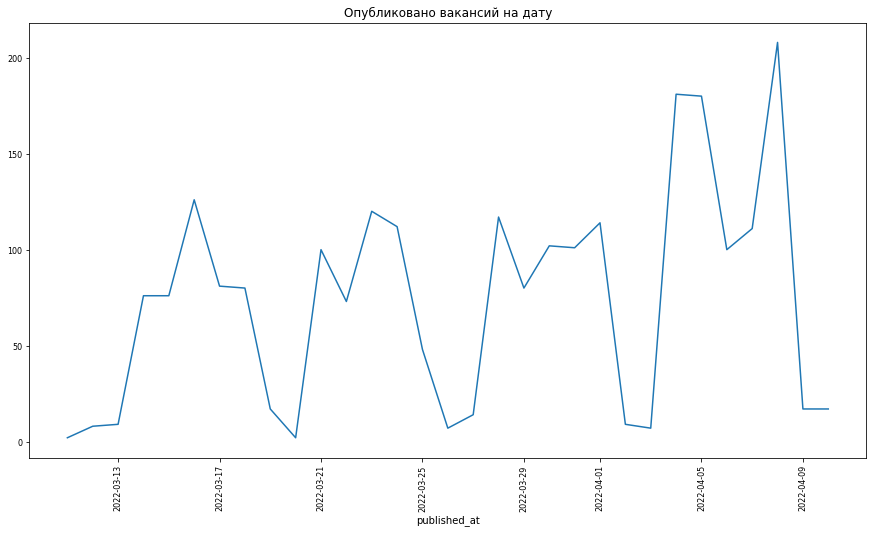

In [364]:
# Постройте график опубликованных вакансий по датам
df_published = extracted[['id','published_at']].groupby(['published_at']).count()
df_published.id.plot(x='Дата', y='Кол-во', fontsize=8, title='Опубликовано вакансий на дату', figsize=(15,8), rot=90)

День недели, в который пбликуется больше всего вакансий: Monday


C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """
C:\Users\max_i\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


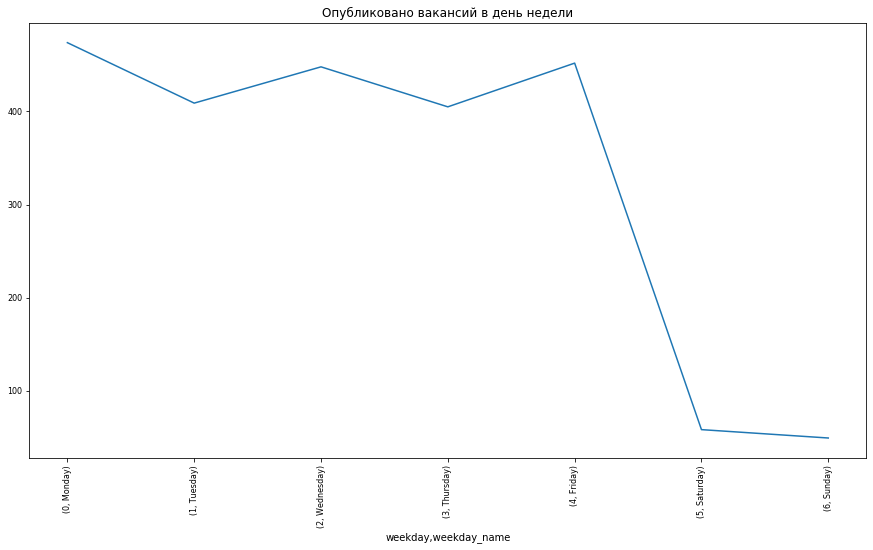

In [365]:
# Переведите даты в дни недели, и определите день недели, в который больше всего публикуют вакансий
import calendar

df_published__at_weekday = extracted[['id','published_at']]#
df_published__at_weekday['weekday_name'] = df_published__at_weekday.published_at.apply(lambda x: calendar.day_name[x.weekday()])
df_published__at_weekday['weekday'] = df_published__at_weekday.published_at.apply(lambda x: x.weekday())
df_published__at_weekday = df_published__at_weekday.groupby(['weekday', 'weekday_name']).count().sort_values(by=['weekday'])
print('День недели, в который пбликуется больше всего вакансий: ' + df_published__at_weekday.reset_index().sort_values(by=['id']).tail(1).weekday_name.values[0])
df_published__at_weekday.id.plot(x='C', y='id', fontsize=8, title='Опубликовано вакансий в день недели', figsize=(15,8), rot=90)


In [366]:
# Найдите те вакансии с использованием python, которые вам интересны
extracted['py_flag'] = extracted.skills.apply( lambda x: 'Python' in x)
my_vac = extracted[extracted.py_flag]
my_vac = my_vac[my_vac['type.name'] == 'Открытая']
my_vac = my_vac[my_vac['employment.name'] == 'Полная занятость']
my_vac = my_vac[my_vac['schedule.name'] == 'Полный день']
# my_vac = my_vac[my_vac['experience.name'] != 'Нет опыта']

my_vac

,id,name,description,key_skills,archived,specializations,professional_roles,published_at,created_at,negotiations_url,...,salary.gross,type.name,experience.name,schedule.name,employment.name,department.name,employer.name,salary,skills,py_flag
0,54621797,QA-инженер,<p><strong>Мы в поисках QA-инженера в один из ...,"[{'name': 'PostgreSQL'}, {'name': 'Git'}, {'na...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '124', 'name': 'Тестировщик'}]",2022-04-06,2022-04-06,None,...,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[PostgreSQL, Git, Atlassian Jira, Java, Spring...",True
0,54559086,Data Scientist,<p>Команда по работе с данными Сбера сильно ра...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-04-04,2022-04-04,None,...,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Python, SQL, Математическая статистика, Матем...",True
0,54682944,Data Scientist,"<p>Дорогой кандидат, мы - динамично растущая к...","[{'name': 'Python'}, {'name': 'Numpy'}, {'name...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-04-08,2022-04-08,None,...,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Python, Numpy, Pandas, Математическая статист...",True
0,54558976,Бизнес-аналитик,<p><strong>Вам предстоит:</strong></p> <ul> <l...,"[{'name': 'Python'}, {'name': 'SQL'}, {'name':...",False,"[{'id': '17.751', 'name': 'Другое', 'profarea_...","[{'id': '10', 'name': 'Аналитик'}]",2022-04-04,2022-04-04,None,...,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Python, SQL, Умение работать в коллективе, R,...",True
0,54662340,Data Scientist в области рекомендательных систем,"<p>Дорогой кандидат, мы - динамично растущая к...","[{'name': 'DS'}, {'name': 'ML'}, {'name': 'Pyt...",False,"[{'id': '17.751', 'name': 'Другое', 'profarea_...","[{'id': '10', 'name': 'Аналитик'}]",2022-04-07,2022-04-07,None,...,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[DS, ML, Python]",True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
0,49792719,DevOps инженер собственной сборки,<p>Мы создаем команду для разработки продукта ...,"[{'name': 'Python'}, {'name': 'Linux'}, {'name...",False,"[{'id': '1.270', 'name': 'Сетевые технологии',...","[{'id': '114', 'name': 'Системный инженер'}]",2022-03-14,2022-03-14,None,...,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Python, Linux, Atlassian Jira, Atlassian Conf...",True
0,47328162,Разработчик Java Core,"<p>Ищем разработчика в команду, работающую над...","[{'name': 'Oracle Pl/SQL'}, {'name': 'SQL'}, {...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-03-14,2022-03-14,None,...,NaN,Открытая,От 1 года до 3 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Oracle Pl/SQL, SQL, Hadoop, Python, SCALA, Ja...",True
0,52175383,DevOps инженер,"<p>Кратко о нас:</p> <p>Мы - дружная, амбициоз...","[{'name': 'Kubernetes'}, {'name': 'Git'}, {'na...",False,"[{'id': '1.270', 'name': 'Сетевые технологии',...","[{'id': '114', 'name': 'Системный инженер'}]",2022-03-15,2022-03-15,None,...,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[Kubernetes, Git, Linux, Python, PostgreSQL]",True
0,53930852,Go-разработчик (Identity and Access Management),<p>Наша корпоративная облачная платформа являе...,"[{'name': 'PostgreSQL'}, {'name': 'SQL'}, {'na...",False,"[{'id': '1.221', 'name': 'Программирование, Ра...","[{'id': '96', 'name': 'Программист, разработчи...",2022-03-16,2022-03-16,None,...,NaN,Открытая,От 3 до 6 лет,Полный день,Полная занятость,Сбер. IT,Сбербанк,None,"[PostgreSQL, SQL, Python, ООП, Go]",True


In [393]:
# Определите по полю skills какие навыки больше всего востребованы для этих вакансий, и
my_vac_tmp = my_vac[['id', 'skills']].reset_index()
my_vac_tmp = (my_vac_tmp.skills.apply(pd.Series)
.merge(my_vac_tmp, right_index = True, left_index = True)
.drop(["skills"], axis = 1)
 .melt(id_vars = ['id'], value_name = "skill")
.drop("variable", axis = 1)
)
my_vac_tmp = my_vac_tmp[my_vac_tmp.skill != 0]
my_vac_tmp

,id,skill
0,54621797,PostgreSQL
1,54559086,Python
2,54682944,Python
3,54558976,Python
4,54662340,DS
...,...,...
2055,49792719,NaN
2056,47328162,NaN
2057,52175383,NaN
2058,53930852,NaN


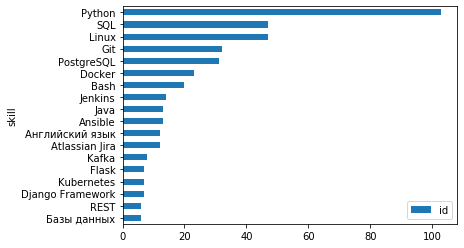

In [397]:
my_vac_tmp1 = my_vac_tmp.groupby(['skill']).count()
my_vac_tmp1 = my_vac_tmp1.query('id > 5 ')
my_vac_tmp1.sort_values(by='id', ascending=True).plot(kind='barh')
plt.show()

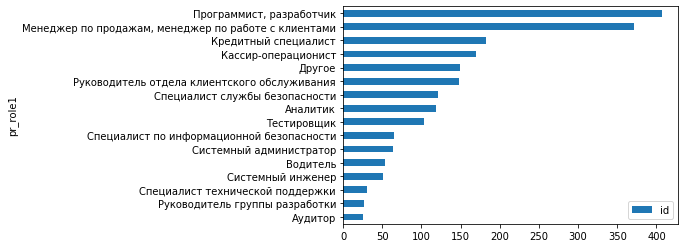

In [401]:
# Постройте график наиболее востребованных вакансий
extracted_most_popular = extracted
extracted_most_popular['pr_role']  = extracted_most_popular.professional_roles.apply(lambda x: [d['name'] for d in x])
extracted_most_popular = extracted_most_popular[['id', 'pr_role' ]].reset_index()
extracted_most_popular = (extracted_most_popular.pr_role.apply(pd.Series)
.merge(extracted_most_popular, right_index = True, left_index = True)
.drop(["pr_role"], axis = 1)
 .melt(id_vars = ['id'], value_name = "pr_role1")
.drop("variable", axis = 1)
)

extracted_most_popular = extracted_most_popular[extracted_most_popular.pr_role1 != 0]

extracted_most_popular = extracted_most_popular.groupby(['pr_role1']).count()

extracted_most_popular = extracted_most_popular.query('id > 15 ')
extracted_most_popular.sort_values(by='id', ascending=True).plot(kind='barh')
plt.show()
